## Common libraries


---



In [37]:
import pandas as pd
import numpy as np

## Download dataset


---



In [38]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

## Feature Names


---



In [39]:
feature_names = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price'
]

## Download dataset


---



In [40]:
# los valores desconocidos en el dataset están marcados con una interrogación
df = pd.read_csv(
    '/content/datasets/imports-85.data',
    names = feature_names,
    na_values = '?'
)

## Setting numeric, categorical and output labels


---



In [41]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_labels = [
    'symboling',
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'  
]

categorical_labels = [
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location'
    'engine_type',
    'num_of_cylinders',
    'fuel_system'
]

input_labels = numeric_labels + categorical_labels

output_labels = 'price'

print(f'Propiedades numéricas: {numeric_labels} ({len(numeric_labels)})')
print(f'Propiedades categóricas: {categorical_labels} ({len(categorical_labels)})')
print(f'Propiedad objetivo: {output_labels}')

Propiedades numéricas: ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'] (15)
Propiedades categóricas: ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_locationengine_type', 'num_of_cylinders', 'fuel_system'] (9)
Propiedad objetivo: price


## Preprocess


---



In [42]:
# a los atributos normalized_losses, bore, stroke, horsepower y peak_rpm
# se les deben sustituir los valores nan por la media de la columna
features_to_be_replaced = [
    'normalized_losses',
    'bore',
    'stroke',
    'horsepower',
    'peak_rpm'
]
foo = [df[f].fillna(df[f].mean(), inplace=True) for f in features_to_be_replaced]     

In [43]:
# al atributo num_doors se le debe sustituir los valores nan por la mode de la
# columna
df['num_of_doors'].replace(
    to_replace=np.NAN,
    value=df.num_of_doors.mode().values[0],
    inplace=True
)

In [44]:
print(f'Número total de valores nulos: <{df.num_of_doors.isna().sum()}>')
print('-------------------------------------')
print(df.num_of_doors[df.num_of_doors.isna()])
print('-------------------------------------')
df_temp = cols_with_missing_values(df)
df_temp

Número total de valores nulos: <0>
-------------------------------------
Series([], Name: num_of_doors, dtype: object)
-------------------------------------


price    4
dtype: int64

In [45]:
# el atributo price también incluye algunos valores nulos, en este caso, y dado
# que se trata de la variable objetivo, no hay mucho que se pueda hacer,
# por lo que simplemente se eliminan las filas sin precio
before = len(df)
print(f'Número de filas antes de quitar los NAN: <{before}>')
df.dropna(inplace=True)
after = len(df)
print(f'Número de filas después de quitar los NAN: <{after}>')
print('-------------------------------------')
print(f'Se han eliminado: <{before - after}> filas.')

Número de filas antes de quitar los NAN: <205>
Número de filas después de quitar los NAN: <201>
-------------------------------------
Se han eliminado: <4> filas.


In [46]:
# después de borrar filas es conveniente resetear el índice del dataframe
df.reset_index(drop = True, inplace = True)

In [47]:
print(f'Número total de valores nulos: <{df.isna().sum().sum()}>')
print('-------------------------------------')
df_temp = cols_with_missing_values(df)
df_temp

Número total de valores nulos: <0>
-------------------------------------


Series([], dtype: int64)

In [48]:
# mediante esta función se reemplazan todos los outliers
# cualquier valor por encima o por debajo de los
# límites superior o inferior es sustituido por la mediana
def replace_outliers(df, feature_name, statistic):
    if statistic == 'median': VALUE = df[feature_name].quantile(0.5)
    elif statistic == 'mean': VALUE = df[feature_name].mean()
    else: raise ValueError('Wrong <statistic> input: <mean> or <median> values allowed')
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                    VALUE, 
                                    df[feature_name])

In [49]:
features_with_outliers = [
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'curb_weight',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'
]

In [50]:
# Replacing outliers over all features by median statistic
# --------------------------------------------------------
for cols in features_with_outliers:
    replace_outliers(df, cols, 'mean')

In [51]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_labels = [
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg'  
]

categorical_labels = [
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'num_of_cylinders',
    'fuel_system'
]

input_labels = numeric_labels + categorical_labels

output = 'price'

print(f'Propiedades numéricas: {numeric_labels} ({len(numeric_labels)})')
print(f'Propiedades categóricas: {categorical_labels} ({len(categorical_labels)})')
print(f'Propiedad objetivo: <{output}>')
print(f'----------------------------------------------------------------------')
print(f'Número de atributos que se incluirán en el estudio:', end=' ')
print(f'<{len(input_labels)}>')

Propiedades numéricas: ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'] (14)
Propiedades categóricas: ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system'] (10)
Propiedad objetivo: <price>
----------------------------------------------------------------------
Número de atributos que se incluirán en el estudio: <24>


Turning categorical features into numeric ones with `LabelEncoder`

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cat in categorical_labels:
    le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    print(le.classes_)

# le.inverse_transform()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['diesel' 'gas']
['std' 'turbo']
['four' 'two']
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
['4wd' 'fwd' 'rwd']
['front' 'rear']
['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


Scaling input variables (but not target label)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nparray = scaler.fit_transform(df[input_labels])
df_scaled = pd.DataFrame(data=nparray, columns=input_labels).join(df[output_labels])

In [54]:
len(df_scaled[input_labels].columns.values)

24

## Splitting data into train and test sets


---



25% test data and 75% for training

In [55]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df_scaled[input_labels + [output_labels]],
    test_size = 0.25, random_state = 0
    )

## Model Parameters

`Loss` ***Parameter***
> * [Keras Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

`Accuracy Metrics` ***Parameter***
> * [Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

`Initializer` ***Parameter***
> * [Keras initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)

`Activation` ***Parameter***
> * [Keras activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

In [56]:
from keras.initializers import HeNormal, GlorotNormal, GlorotUniform

# Keras initializer serialization / deserialization
k1 = HeNormal(seed=0) # ReLU initializer 
k2 = HeNormal(seed=1) # ReLU initializer
k3 = GlorotNormal(seed=0) # Tahn, Sigmoid, Linear initializer
k4 = GlorotUniform(seed=0)

# Built-in loss functions
L1 = 'mean_squared_error'

# Keras metrics
m1 = 'mse'
m2 = 'mean_absolute_error'
m3 = 'mean_absolute_percentage_error'
            
# Activation
a1 = 'relu'
a2 = 'sigmoid'
a3 = 'softmax'
a4 = 'linear'

# Epochs
epochs = 1000

# Batch size
batch_size = df_train.shape[0] // 3

# Number of perceptrons for each hidden layer
perceptrons = 48

# Cross-validation partitions
partitions = 5

# LEARNING RATE
learning_rate = 0.01
drop_learning_rate = 0.25
epochs_drop_learning_rate = 256

# Cross_Val_Score metrics
cvsm = 'neg_mean_squared_error'

# Number of input features
num_of_input_cols = len(df_train.columns.values) - 1
print(num_of_input_cols)

24


In [57]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate = learning_rate)

from keras.callbacks import LearningRateScheduler
# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = learning_rate
    drop = drop_learning_rate
    epochs_drop = epochs_drop_learning_rate
    lr = initial_lr * (drop ** (perceptrons // epochs_drop_learning_rate))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Metrics for Keras Models


---


All Keras metrics
> * [Keras Docs: Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


Mean absolute percentage error (MAPE)
> * [Mean absolute percentage error Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

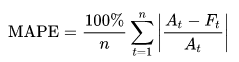

Mean squared error (MSE)
> * [Mean squared error Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)

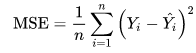

Mean absolute error (MAE)
> * [Mean absolute error Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)

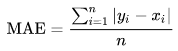

## Setting the Model

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(perceptrons, input_shape=(
                                        num_of_input_cols,),
                                        kernel_initializer=k1,
                                        activation=a1)
                                        )
    model.add(Dense(perceptrons, kernel_initializer=k2, activation=a1))
    model.add(Dense(1, activation=a4, kernel_initializer=k4))
    # Compile model
    model.compile(
        loss = L1,
        optimizer = optimizer,
        metrics = [
            m2,
            m3
        ]
    )
    return model

In [59]:
model = baseline_model()

## Running the model


---



Computation time: `4 min`

In [60]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = partitions)
for train, val in cv.split(df_train):
    # ------------------------------------
    X_train = df_train.iloc[train]
    X_train = X_train.drop([output_labels], axis = 1, inplace = False)
    X_val = df_train.iloc[val]
    X_val = X_val.drop([output_labels], axis = 1, inplace = False)
    y_train = df_train[output_labels].iloc[train]
    y_val = df_train[output_labels].iloc[val]
    # ------------------------------------
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_val, y_val),
        epochs = epochs,
        batch_size = batch_size,
        verbose = 0,
        callbacks=[lr_scheduler],
        use_multiprocessing=True
    )
    # ------------------------------------
    outcome = model.get_metrics_result()  

## Displaying training model accuracy


---



From model history object

In [62]:
from statistics import mean

loss = mean(history.history['loss'])
print(f'Mean Squared Error: {round(loss, 2)}')
print(f'---------------------------------------------------------')
mae = mean(history.history['mean_absolute_error'])
print(f'Mean Absolute Error: {round(mae, 2)}')
print(f'---------------------------------------------------------')
mape = mean(history.history['mean_absolute_percentage_error'])
print(f'Mean Absolute Percentage Error: {round(mape, 2)}%')
print(f'---------------------------------------------------------')

Mean Squared Error: 195993.03
---------------------------------------------------------
Mean Absolute Error: 208.8
---------------------------------------------------------
Mean Absolute Percentage Error: 1.82%
---------------------------------------------------------


dict_keys(['loss', 'mean_absolute_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'lr'])


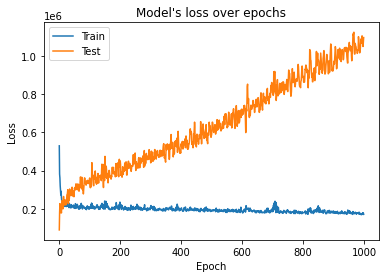

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss over epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'lr'])


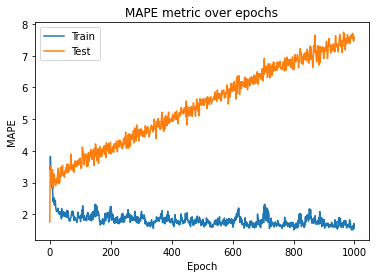

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

print(history.history.keys())
# "MAE"
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('MAPE metric over epochs')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(history.history.keys())
# "MAPE"
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title("MAE metric over epochs")
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From model metric result

In [69]:
outcome['loss'].numpy()

1097189.9

In [71]:
loss = outcome['loss'].numpy()
print(f'Mean Squared Error: {round(loss, 2)}')
print(f'---------------------------------------------------------')
mae = outcome['mean_absolute_error'].numpy()
print(f'Mean Absolute Error: {round(mae, 2)}')
print(f'---------------------------------------------------------')
mape = outcome['mean_absolute_percentage_error'].numpy()
print(f'Mean Absolute Percentage Error: {round(mape, 2)}%')
print(f'---------------------------------------------------------')

Mean Squared Error: 1097189.875
---------------------------------------------------------
Mean Absolute Error: 838.3599853515625
---------------------------------------------------------
Mean Absolute Percentage Error: 7.579999923706055%
---------------------------------------------------------


## Evaluate model and show predictions accuracy


---



In [73]:
X_test = df_test.drop([output_labels], axis = 1, inplace = False)
y_test = df_test[output_labels]

In [86]:
mse, mae, mape = model.evaluate(X_test, y_test)
accuracy = 100 - mape
print(f'---------------------------------------------------------')
print('Mean Squared Error:\u0009\u0009%.2f' % (mse))
print('Mean Absolute Error:\u0009\u0009%.2f' % (mae))
print(f'Mean Absolute Percentage Error:\u0009 {round(mape,2)}%')
print(f'Mean Absolute Percentage Error:\u0009 {round(accuracy,2)}%')
print(f'---------------------------------------------------------')

2/2 [==============================] - 0s 7ms/step - loss: 16212702.0000 - mean_absolute_error: 2472.8779 - mean_absolute_percentage_error: 16.0124
---------------------------------------------------------
Mean Squared Error:		16212702.00
Mean Absolute Error:		2472.88
Mean Absolute Percentage Error:	 16.01%
Mean Absolute Percentage Error:	 83.99%
---------------------------------------------------------


### Getting predictions


---



In [107]:
y_pred = model.predict(
    X_test,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

2/2 [==============================] - 0s 7ms/step


### Displaying model schema


---



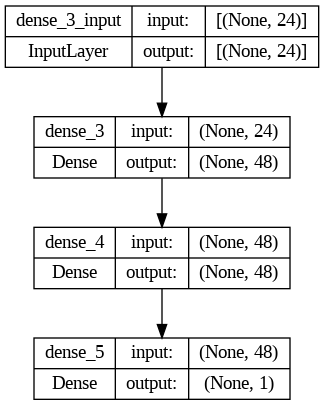

In [94]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Definitive parameters list (with target variable scaled)
---

```python
# Keras initializer serialization / deserialization
k1 = HeNormal(seed=0) # ReLU initializer 
k2 = HeNormal(seed=1) # ReLU initializer
k3 = GlorotNormal(seed=0) # Tahn, Sigmoid, Linear initializer
k4 = GlorotUniform(seed=0)

# Built-in loss functions
L1 = 'mean_squared_error'

# Keras metrics
m1 = 'mse'
m2 = 'mean_absolute_error'
m3 = 'mean_absolute_percentage_error'
            
# Activation
a1 = 'relu'
a2 = 'sigmoid'
a3 = 'softmax'
a4 = 'linear'

# Epochs
epochs = 1000

# Batch size
batch_size = df_train.shape[0] // 3

# Number of perceptrons for each hidden layer
perceptrons = 48

# Cross-validation partitions
partitions = 5

# LEARNING RATE
learning_rate = 0.01
drop_learning_rate = 0.25
epochs_drop_learning_rate = 256
```

---

## ***SCORE LIST***

(obtained with test data)

```python
---------------------------------------------------------
Mean Squared Error:		16212702.00
Mean Absolute Error:		2472.88
Mean Absolute Percentage Error:	 16.01%
Mean Absolute Percentage Error:	 83.99%
---------------------------------------------------------
```

# Conclusiones



La calidad del modelo (disminución de la tasa de errores) aumenta cuando:

> * Creamos, como mínimo, dos capas intermedias de perceptrones.

> * Se añade a cada capa mayor número de perceptrones (el doble que los atributos de entrada)

> * Número elevado de épocas de entrenamiento (superior a `1000`)

> * Utilizar la función de activación `linear` en la capa de salida para no utilizar un modelo de regresión linear simple (cuando no se pone función de activación alguna en la capa de salida) y mejorar un poco la capacidad del modelo para ajustarse a los datos.

> * Probar con distintas funciones de inicialización de pesos. En nuestro caso la función de activación de salida `linear` está combinada con la de inicialización `glorot_uniform`. También se puede utilizar la `glorot_normal`.

> * Emplear técnicas de disminución de la tasa de aprendizaje del modelo conforme avanzan las épocas.

> * Utilizar técnicas de validación cruzada durante el entrenamiento.

> * Dividir el dataset en datos para entrenamiento y datos para test/validación. Con este procedimiento evitamos obtener la calidad del modelo con los mismos datos utilizados durante el entrenamiento, es decir, se introducen datos que el modelo no conoce para evaluarlo por lo cual el resultado obtenido es más fiable que si sólo se usáramos un único conjunto.